# Monte Carlo Simulation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from pandas_datareader import data as pdr
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
from prophet import Prophet

In [2]:
ticker = 'XOM'
df_yf = pdr.get_data_yahoo(ticker, start='2022-03-16')
df_yf

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-16   77.809998   78.620003   76.250000   76.930000   74.243629   
2022-03-17   78.180000   79.150002   77.070000   78.980003   76.222046   
2022-03-18   79.059998   79.389999   78.099998   78.669998   75.922867   
2022-03-21   80.120003   82.519997   79.739998   82.199997   79.329590   
2022-03-22   81.629997   82.199997   80.790001   81.839996   78.982170   
...                ...         ...         ...         ...         ...   
2023-04-03  113.389999  116.849998  113.120003  116.129997  116.129997   
2023-04-04  116.260002  116.699997  114.169998  115.019997  115.019997   
2023-04-05  115.349998  117.000000  114.309998  116.989998  116.989998   
2023-04-06  116.860001  117.180000  114.769997  115.050003  115.050003   
2023-04-10  114.779999  116.180000  114.169998  114.540001  114.540001   

              Volume  
Date                  
2022-03-16  37812300  
2022-03-17  34041900  
2022-03-18  41461500  
2022-03-21  33089300  
2022-03-22  23132200  
...              ...  
2023-04-03  28087700  
2023-04-04  16365500  
2023-04-05  16479500  
2023-04-06  15778000  
2023-04-10  13004600  

[268 rows x 6 columns]

In [3]:
data = df_yf[['Adj Close']]
data

Adj Close
Date                  
2022-03-16   74.243629
2022-03-17   76.222046
2022-03-18   75.922867
2022-03-21   79.329590
2022-03-22   78.982170
...                ...
2023-04-03  116.129997
2023-04-04  115.019997
2023-04-05  116.989998
2023-04-06  115.050003
2023-04-10  114.540001

[268 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

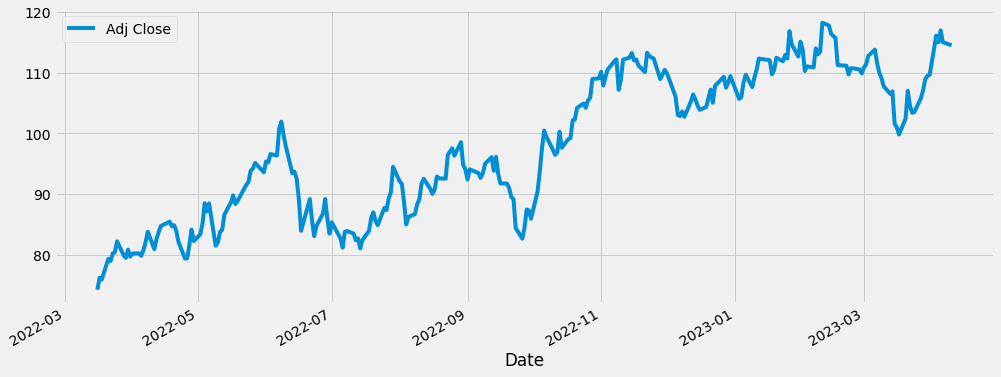

In [4]:
data.plot(figsize=(15,6))

In [5]:
stock_returns = np.log(1 + data.pct_change())
#stock_returns.tail()

Text(0, 0.5, 'Frequency')

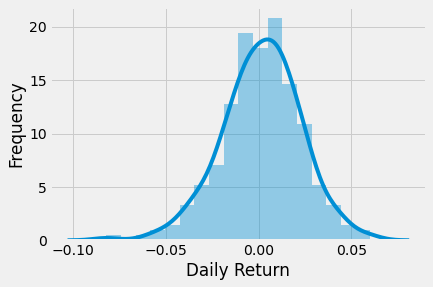

In [6]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

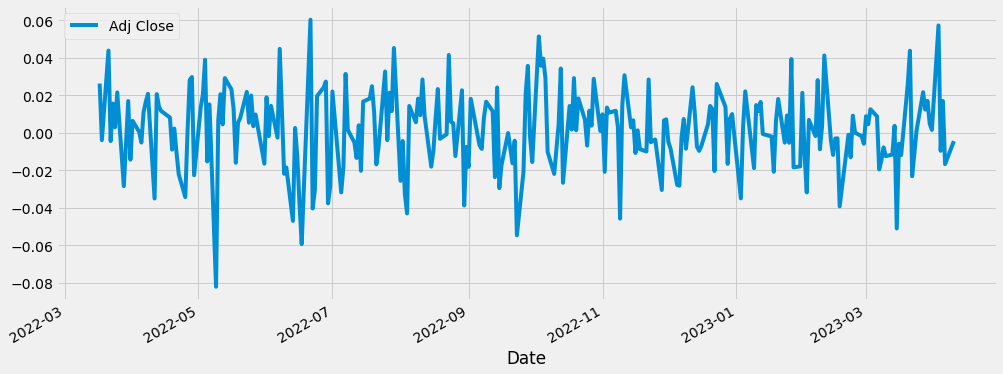

In [7]:
stock_returns.plot(figsize=(15,6))

In [8]:
u = stock_returns.mean()
var = stock_returns.var()

In [9]:
drift = u - (0.5*var)
drift

Adj Close    0.001397
dtype: float64

In [10]:
stddev = stock_returns.std() 
stddev

Adj Close    0.021288
dtype: float64

In [11]:
type(drift)
type(stddev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00139728])

In [13]:
drift.values

array([0.00139728])

In [14]:
stddev.values

array([0.02128776])

In [15]:
x = np.random.rand(10,2)
norm.ppf(x)

array([[ 0.23622591, -0.8371722 ],
       [-2.14662889, -0.07626217],
       [-1.1614219 ,  0.28599258],
       [ 1.02314839, -1.91264416],
       [ 0.96419282,  0.93844833],
       [ 0.7545959 , -0.6577114 ],
       [-0.47249068, -0.01274357],
       [-0.45156162,  0.12753275],
       [-0.07538831, -1.1991791 ],
       [-0.66212083, -0.56489909]])

In [16]:
stdev = stock_returns.std()
days = 15
iterations = 50
Z = norm.ppf(np.random.rand(days, iterations))

In [17]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

In [18]:
S0 = data.iloc[-1]
S0

Adj Close    114.540001
Name: 2023-04-10 00:00:00, dtype: float64

In [19]:
price_paths = np.zeros_like(get_daily_returns)

In [20]:
price_paths.shape

(15, 50)

In [21]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
price_paths[0] = S0

In [23]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

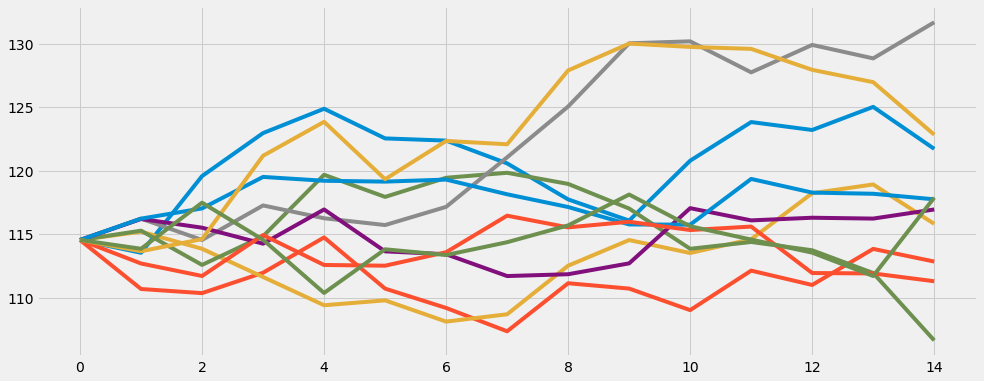

In [24]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths).iloc[:,0:10])

Text(0, 0.5, 'Frequency')

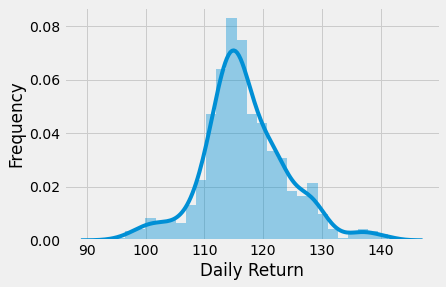

In [25]:
sns.distplot(pd.DataFrame(price_paths).iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [26]:
df1=pd.DataFrame(price_paths)
df1.head()

0           1           2           3           4           5   \
0  114.540001  114.540001  114.540001  114.540001  114.540001  114.540001   
1  113.532248  110.681152  115.194570  115.273579  116.224080  116.193809   
2  119.570859  110.355069  113.846612  112.577730  114.542432  115.508688   
3  122.958585  111.961496  111.625111  114.836668  117.259882  114.249184   
4  124.874443  114.742253  109.400950  119.674750  116.250230  116.943152   

           6           7           8           9   ...          40  \
0  114.540001  114.540001  114.540001  114.540001  ...  114.540001   
1  116.220702  112.688599  113.653070  113.848362  ...  112.933814   
2  117.027464  111.705093  114.609873  117.476764  ...  112.189103   
3  119.505915  114.928402  121.172887  114.554929  ...  113.604817   
4  119.203138  112.572403  123.844488  110.368279  ...  112.832995   

           41          42          43          44          45          46  \
0  114.540001  114.540001  114.540001  114.540001  114.540001  114.540001   
1  112.288211  111.459665  112.930800  116.774863  119.743505  114.085206   
2  111.107601  111.792494  115.628327  112.286071  122.150204  113.949120   
3  108.935315  113.624733  118.475496  113.509936  125.001930  117.960046   
4  111.454061  113.108466  116.377918  114.337288  125.190220  121.442870   

           47          48          49  
0  114.540001  114.540001  114.540001  
1  116.578243  115.015546  115.132369  
2  113.869952  113.797436  112.806778  
3  116.908106  115.336962  117.092423  
4  120.555401  109.938375  120.587682  

[5 rows x 50 columns]

In [27]:
df1.head()

0           1           2           3           4           5   \
0  114.540001  114.540001  114.540001  114.540001  114.540001  114.540001   
1  113.532248  110.681152  115.194570  115.273579  116.224080  116.193809   
2  119.570859  110.355069  113.846612  112.577730  114.542432  115.508688   
3  122.958585  111.961496  111.625111  114.836668  117.259882  114.249184   
4  124.874443  114.742253  109.400950  119.674750  116.250230  116.943152   

           6           7           8           9   ...          40  \
0  114.540001  114.540001  114.540001  114.540001  ...  114.540001   
1  116.220702  112.688599  113.653070  113.848362  ...  112.933814   
2  117.027464  111.705093  114.609873  117.476764  ...  112.189103   
3  119.505915  114.928402  121.172887  114.554929  ...  113.604817   
4  119.203138  112.572403  123.844488  110.368279  ...  112.832995   

           41          42          43          44          45          46  \
0  114.540001  114.540001  114.540001  114.540001  114.540001  114.540001   
1  112.288211  111.459665  112.930800  116.774863  119.743505  114.085206   
2  111.107601  111.792494  115.628327  112.286071  122.150204  113.949120   
3  108.935315  113.624733  118.475496  113.509936  125.001930  117.960046   
4  111.454061  113.108466  116.377918  114.337288  125.190220  121.442870   

           47          48          49  
0  114.540001  114.540001  114.540001  
1  116.578243  115.015546  115.132369  
2  113.869952  113.797436  112.806778  
3  116.908106  115.336962  117.092423  
4  120.555401  109.938375  120.587682  

[5 rows x 50 columns]

In [28]:
u1 = df1.mean()

In [29]:
var1 =df1.var()

In [30]:
u

Adj Close    0.001624
dtype: float64

In [31]:
stock_returns1 = np.log(1 + df1.pct_change())
stock_returns1.tail()

0         1         2         3         4         5         6   \
10  0.039818 -0.015436 -0.008958 -0.027457  0.001199  0.037845 -0.000140   
11  0.024888  0.028131  0.009518  0.004714 -0.018933 -0.008262  0.030632   
12 -0.005059 -0.010119  0.031130 -0.005734  0.016774  0.001799 -0.009056   
13  0.014664  0.025271  0.005816 -0.015884 -0.008207 -0.000574 -0.000775   
14 -0.026800 -0.008799 -0.026444 -0.048542  0.021823  0.006160 -0.003710   

          7         8         9   ...        40        41        42        43  \
10 -0.005652 -0.002019 -0.021395  ...  0.004018  0.014948 -0.044928  0.003464   
11  0.002367 -0.001193 -0.009102  ...  0.028883 -0.025717  0.031489  0.004046   
12 -0.032151 -0.012814 -0.009026  ... -0.038514  0.015439 -0.011966 -0.012007   
13 -0.000289 -0.007621 -0.016321  ... -0.006600  0.002224 -0.023309  0.043577   
14 -0.005506 -0.033095  0.053754  ...  0.014250 -0.021427 -0.012801 -0.012446   

          44        45        46        47        48        49  
10  0.006889  0.003881  0.015916 -0.013430 -0.008708  0.013302  
11 -0.015507  0.013215  0.015439 -0.008623 -0.004951 -0.017915  
12  0.019585  0.001653 -0.024301 -0.031507  0.019639 -0.021650  
13 -0.028305  0.021264 -0.007408 -0.008378 -0.005678 -0.014829  
14 -0.047805 -0.016350  0.003565  0.023689  0.018752  0.010839  

[5 rows x 50 columns]

In [32]:
u1 = stock_returns1 .mean()
var =df1.var()
u1

0     0.004340
1    -0.001067
2     0.000787
3    -0.005109
4     0.009962
5     0.001483
6     0.001969
7    -0.002055
8     0.004994
9     0.002049
10   -0.001760
11    0.004856
12    0.006031
13    0.005171
14    0.007691
15   -0.000723
16    0.007702
17    0.012731
18    0.010873
19    0.004711
20    0.000591
21   -0.011251
22    0.004904
23    0.007184
24    0.002849
25   -0.013497
26    0.000944
27    0.000278
28    0.003762
29   -0.002521
30    0.003695
31   -0.004297
32   -0.010640
33    0.008613
34   -0.010406
35   -0.004296
36    0.001555
37    0.007141
38    0.009379
39    0.007941
40   -0.001948
41   -0.000692
42   -0.004178
43    0.007259
44   -0.004520
45    0.013264
46    0.001510
47   -0.003887
48   -0.000510
49    0.001183
dtype: float64

# Time Series Analysis

## SMA

In [33]:
ticker ='XOM'
df=pdr.get_data_yahoo(ticker, start='2020-1-1')
df.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-03  113.389999  116.849998  113.120003  116.129997  116.129997   
2023-04-04  116.260002  116.699997  114.169998  115.019997  115.019997   
2023-04-05  115.349998  117.000000  114.309998  116.989998  116.989998   
2023-04-06  116.860001  117.180000  114.769997  115.050003  115.050003   
2023-04-10  114.779999  116.180000  114.169998  114.540001  114.540001   

              Volume  
Date                  
2023-04-03  28087700  
2023-04-04  16365500  
2023-04-05  16479500  
2023-04-06  15778000  
2023-04-10  13004600

In [34]:
# drop unwanted columns
df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1, inplace=True)
df

Close
Date                  
2020-01-02   70.900002
2020-01-03   70.330002
2020-01-06   70.870003
2020-01-07   70.290001
2020-01-08   69.230003
...                ...
2023-04-03  116.129997
2023-04-04  115.019997
2023-04-05  116.989998
2023-04-06  115.050003
2023-04-10  114.540001

[823 rows x 1 columns]

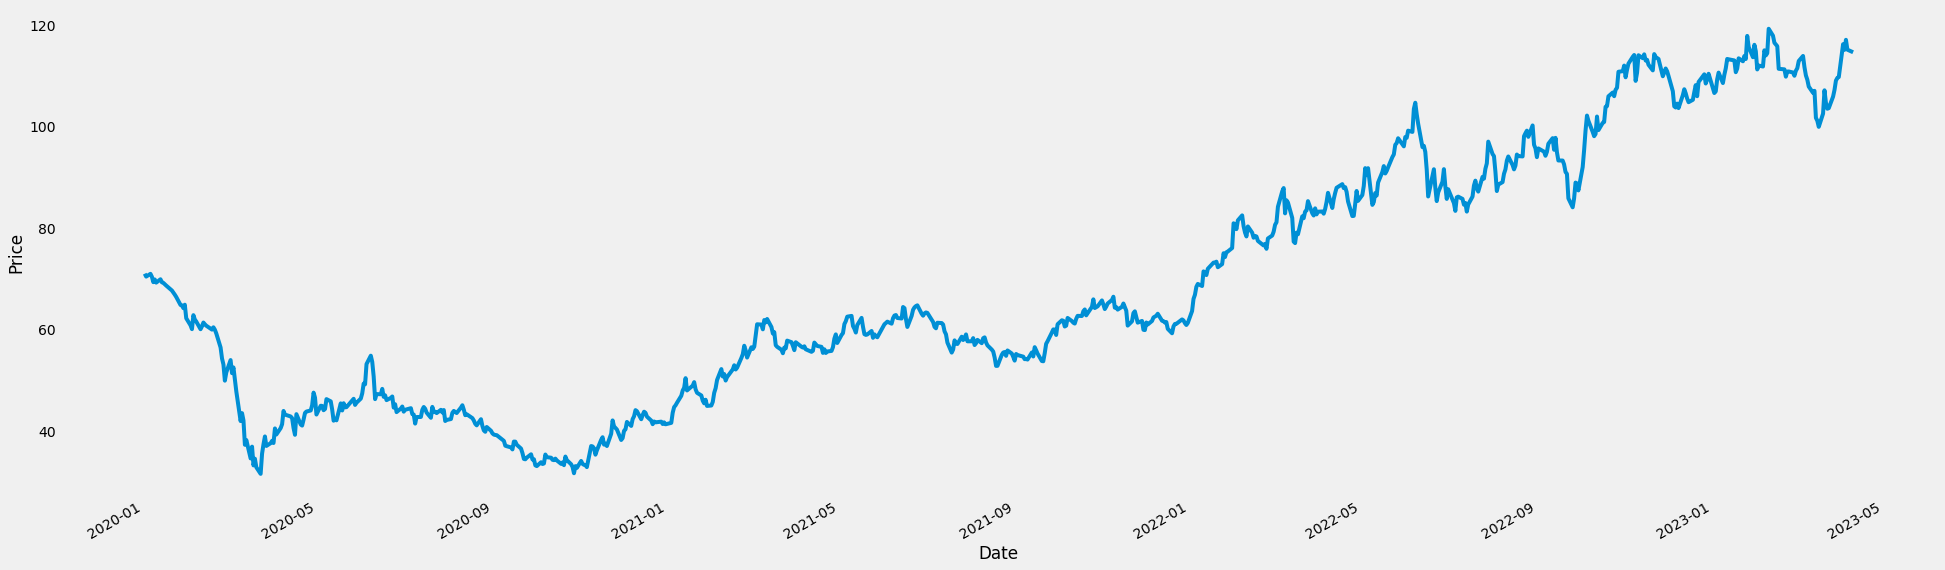

In [35]:
df['Close'].plot(figsize = (30, 10))
plt.grid()
plt.ylabel("Price")
plt.show()

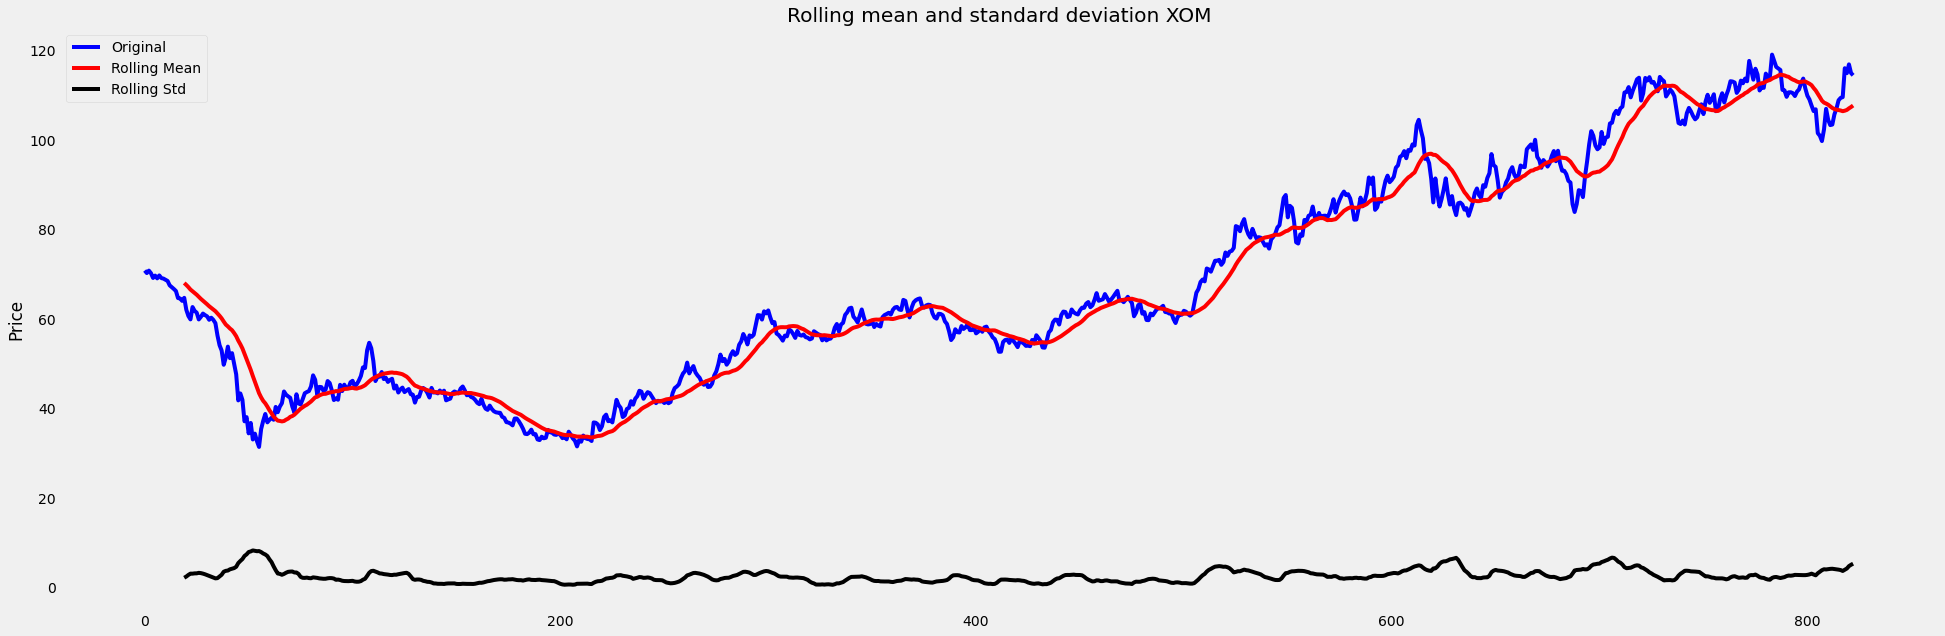

In [64]:
rolling_mean = df['Close'].rolling(20).mean()
rolling_std = df['Close'].rolling(20).std()

plt.figure(figsize = (30, 10))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'XOM')
plt.grid()
plt.ylabel("Price")
plt.show()

In [37]:
df['SMA50'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
df['SMA100'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
df

Close       SMA50      SMA100
Date                                          
2020-01-02   70.900002   70.900002   70.900002
2020-01-03   70.330002   70.615002   70.615002
2020-01-06   70.870003   70.700002   70.700002
2020-01-07   70.290001   70.597502   70.597502
2020-01-08   69.230003   70.324002   70.324002
...                ...         ...         ...
2023-04-03  116.129997  106.632500  110.726600
2023-04-04  115.019997  106.803000  110.771800
2023-04-05  116.989998  107.153500  110.835400
2023-04-06  115.050003  107.449500  110.872200
2023-04-10  114.540001  107.787500  110.807800

[823 rows x 3 columns]

In [38]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA50'] > df['SMA100'], 1.0, 0.0)

In [39]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

Close      SMA50     SMA100  Signal  Position
Date                                                         
2020-01-02  70.900002  70.900002  70.900002     0.0       NaN
2020-01-03  70.330002  70.615002  70.615002     0.0       0.0
2020-01-06  70.870003  70.700002  70.700002     0.0       0.0
2020-01-07  70.290001  70.597502  70.597502     0.0       0.0
2020-01-08  69.230003  70.324002  70.324002     0.0       0.0

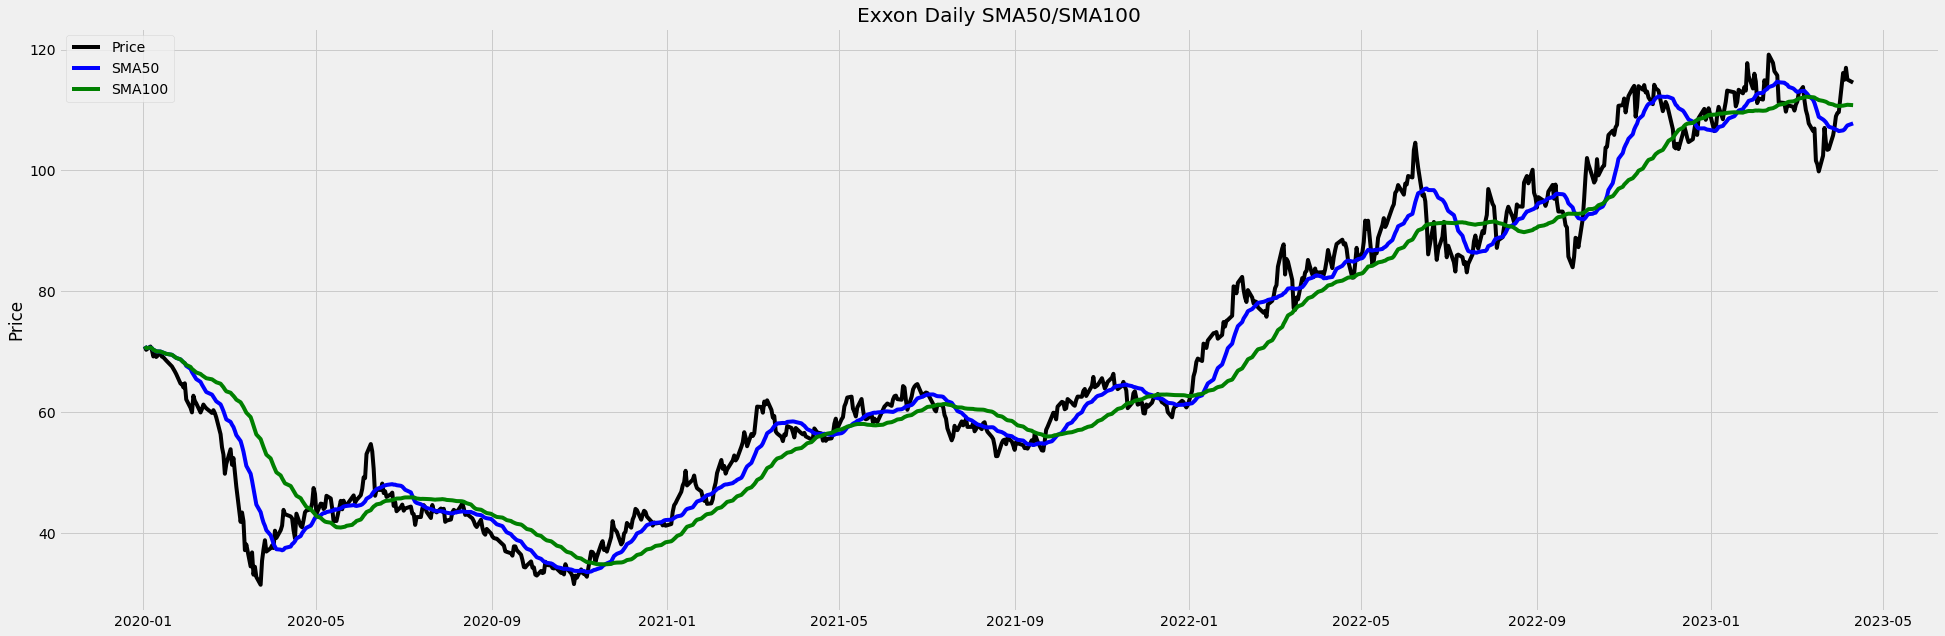

In [40]:
plt.figure(figsize=(30,10))
plt.plot(df["Close"], color="black", label="Price")
plt.plot(df["SMA50"], color="blue", label="SMA50")
plt.plot(df["SMA100"], color="green", label="SMA100")
plt.ylabel("Price")
plt.title("Exxon Daily SMA50/SMA100")
plt.legend()
plt.show()

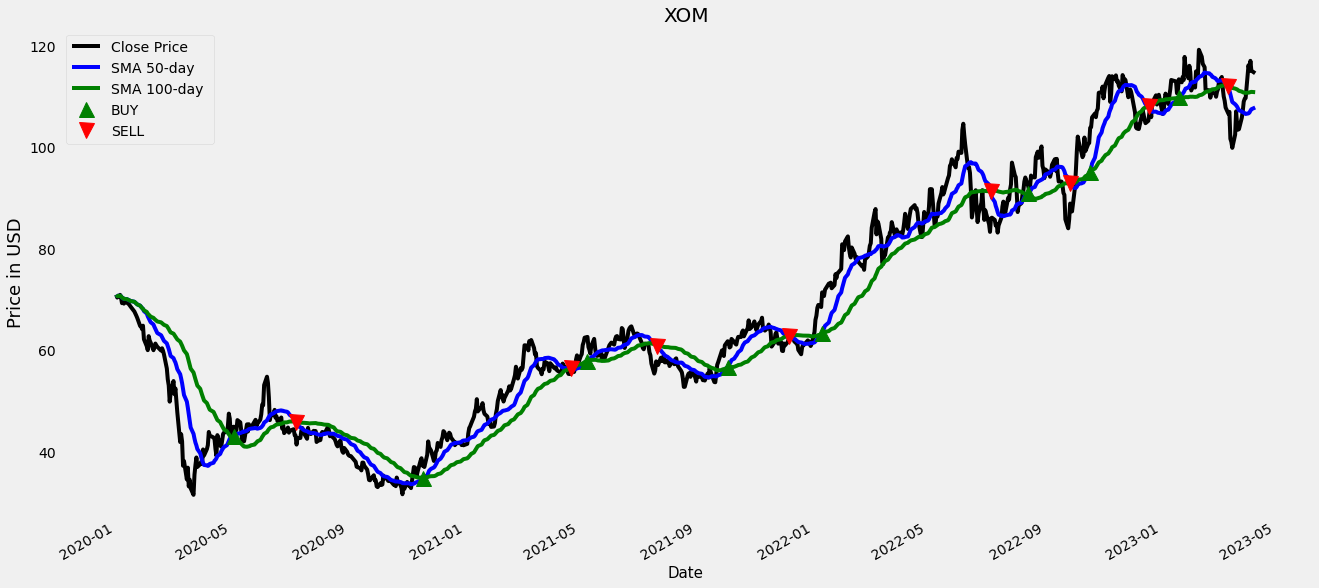

In [41]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close Price') 
df['SMA50'].plot(color = 'b',label = 'SMA 50-day ') 
df['SMA100'].plot(color = 'g', label = 'SMA 100-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA50'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA100'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(ticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [42]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+----------+----------+----------+------------+
| Date                |   Close |    SMA50 |   SMA100 |   Signal | Position   |
|---------------------+---------+----------+----------+----------+------------|
| 2020-05-04 00:00:00 |   44.88 |  42.952  |  42.5194 |        1 | Buy        |
| 2020-07-08 00:00:00 |   43.14 |  45.644  |  45.8974 |        0 | Sell       |
| 2020-11-19 00:00:00 |   37.4  |  34.8545 |  34.8476 |        1 | Buy        |
| 2021-04-23 00:00:00 |   55.57 |  56.355  |  56.4644 |        0 | Sell       |
| 2021-05-10 00:00:00 |   62.58 |  57.86   |  57.7864 |        1 | Buy        |
| 2021-07-22 00:00:00 |   57.11 |  60.575  |  60.8604 |        0 | Sell       |
| 2021-10-04 00:00:00 |   61.72 |  56.59   |  56.3866 |        1 | Buy        |
| 2021-12-07 00:00:00 |   62.27 |  62.6635 |  62.726  |        0 | Sell       |
| 2022-01-11 00:00:00 |   71.35 |  63.2915 |  63.1666 |        1 | Buy        |
| 2022-07-07 00:00:00 |   85.94 |  90.95

# Bollinger Bands
   #####  movement of price and volatility over the time

In [43]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['Close'], df['SMA50'], 20)
df.tail()

Close     SMA50    SMA100  Signal  Position    upper_bb  \
Date                                                                       
2023-04-03  116.129997  106.6325  110.7266     0.0       0.0  114.606307   
2023-04-04  115.019997  106.8030  110.7718     0.0       0.0  115.350154   
2023-04-05  116.989998  107.1535  110.8354     0.0       0.0  116.758656   
2023-04-06  115.050003  107.4495  110.8722     0.0       0.0  117.657095   
2023-04-10  114.540001  107.7875  110.8078     0.0       0.0  118.477459   

             lower_bb  
Date                   
2023-04-03  98.658693  
2023-04-04  98.255845  
2023-04-05  97.548344  
2023-04-06  97.241905  
2023-04-10  97.097541

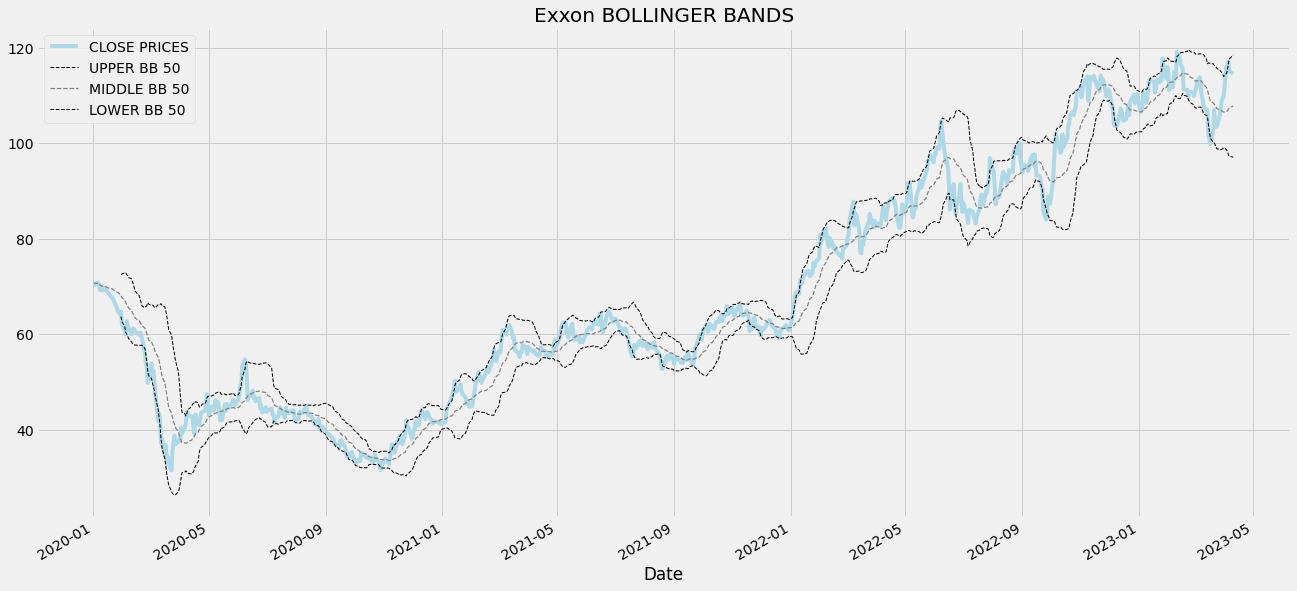

In [44]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', color = 'lightblue')
df['upper_bb'].plot(label = 'UPPER BB 50', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB 50', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB 50', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('Exxon BOLLINGER BANDS')
plt.show()

In [45]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Close'], df['lower_bb'], df['upper_bb'])


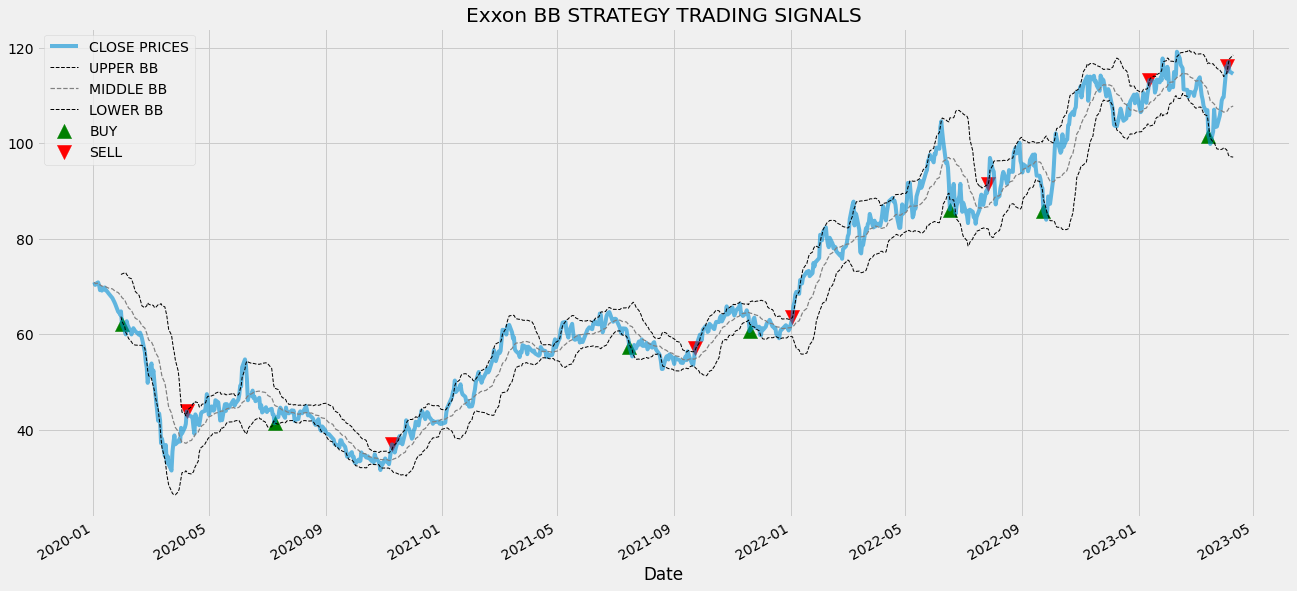

In [46]:
plt.figure(figsize = (20,10))
df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.6)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('Exxon BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

### If we compare below cross over date with Yahoo Finance similar representation was found
#### 2022-12-20 00:00:00 |  106.69 | 107.874  | 108.022  |        0 | Sell     

# Forecasting

In [47]:
ticker ='XOM'
df=pdr.get_data_yahoo(ticker, start='2020-1-1')

[*********************100%***********************]  1 of 1 completed


In [48]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   70.239998   71.019997   70.239998   70.900002   59.038689   
2020-01-03   71.339996   71.370003   70.160004   70.330002   58.564049   
2020-01-06   70.320000   71.360001   70.230003   70.870003   59.013702   
2020-01-07   70.500000   70.519997   69.510002   70.290001   58.530735   
2020-01-08   70.110001   70.290001   69.169998   69.230003   57.648087   
...                ...         ...         ...         ...         ...   
2023-04-03  113.389999  116.849998  113.120003  116.129997  116.129997   
2023-04-04  116.260002  116.699997  114.169998  115.019997  115.019997   
2023-04-05  115.349998  117.000000  114.309998  116.989998  116.989998   
2023-04-06  116.860001  117.180000  114.769997  115.050003  115.050003   
2023-04-10  114.779999  116.180000  114.169998  114.540001  114.540001   

              Volume  
Date                  
2020-01-02  12456400  
2020-01-03  17386900  
2020-01-06  20081900  
2020-01-07  17387700  
2020-01-08  15137700  
...              ...  
2023-04-03  28087700  
2023-04-04  16365500  
2023-04-05  16479500  
2023-04-06  15778000  
2023-04-10  13004600  

[823 rows x 6 columns]

In [49]:
print (f"start date : {str(df.index.min())}")
print (f"end date : {str(df.index.max())}")

start date : 2020-01-02 00:00:00
end date : 2023-04-10 00:00:00


In [50]:
df=df.reset_index()
df[['ds','y']]= df[['Date','Close']]

In [65]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
818 2023-04-03  113.389999  116.849998  113.120003  116.129997  116.129997   
819 2023-04-04  116.260002  116.699997  114.169998  115.019997  115.019997   
820 2023-04-05  115.349998  117.000000  114.309998  116.989998  116.989998   
821 2023-04-06  116.860001  117.180000  114.769997  115.050003  115.050003   
822 2023-04-10  114.779999  116.180000  114.169998  114.540001  114.540001   

       Volume         ds           y  
818  28087700 2023-04-03  116.129997  
819  16365500 2023-04-04  115.019997  
820  16479500 2023-04-05  116.989998  
821  15778000 2023-04-06  115.050003  
822  13004600 2023-04-10  114.540001

In [52]:
ph_df=df.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [53]:
ph_df.head()

ds          y
0 2020-01-02  70.900002
1 2020-01-03  70.330002
2 2020-01-06  70.870003
3 2020-01-07  70.290001
4 2020-01-08  69.230003

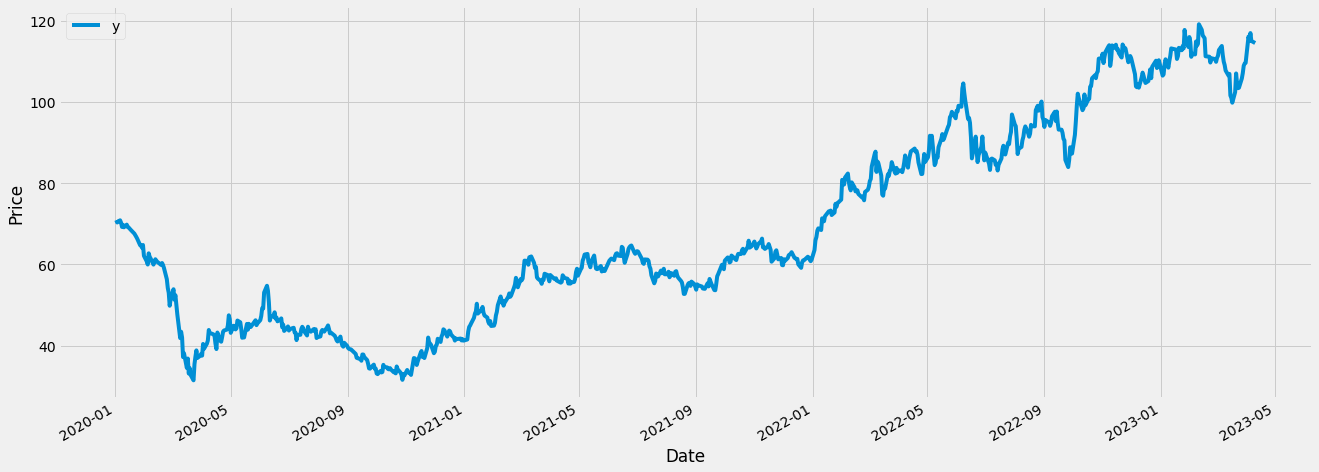

In [54]:
ax = ph_df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [55]:
import plotly.express as px
fig = go.Figure([go.Scatter(x=ph_df['ds'], y=ph_df['y'])])
fig.update_layout(title_text="Actual Prices")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="Price")
fig.show()

In [56]:
model = Prophet(daily_seasonality=True)
model.fit(ph_df)

22:19:44 - cmdstanpy - INFO - Chain [1] start processing
22:19:45 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future=model.make_future_dataframe(periods=365,freq='D')

In [58]:
predictions=model.predict(future)

In [63]:
predictions.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-01-02  69.816816   63.947724   72.575720    69.816816    69.816816   
1 2020-01-03  69.498427   64.472220   72.491025    69.498427    69.498427   
2 2020-01-06  68.543262   64.300299   72.256503    68.543262    68.543262   
3 2020-01-07  68.224873   64.312208   72.523759    68.224873    68.224873   
4 2020-01-08  67.906485   64.014068   72.495359    67.906485    67.906485   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0       -1.236674             -1.236674             -1.236674 -1.014122  ...   
1       -1.009347             -1.009347             -1.009347 -1.014122  ...   
2       -0.303504             -0.303504             -0.303504 -1.014122  ...   
3        0.083131              0.083131              0.083131 -1.014122  ...   
4        0.269063              0.269063              0.269063 -1.014122  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0 -0.137444     -0.137444     -0.137444 -0.085107     -0.085107     -0.085107   
1 -0.111357     -0.111357     -0.111357  0.116132      0.116132      0.116132   
2 -0.080088     -0.080088     -0.080088  0.790706      0.790706      0.790706   
3  0.066351      0.066351      0.066351  1.030902      1.030902      1.030902   
4  0.009008      0.009008      0.009008  1.274177      1.274177      1.274177   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  68.580142  
1                         0.0  68.489080  
2                         0.0  68.239758  
3                         0.0  68.308004  
4                         0.0  68.175548  

[5 rows x 22 columns]

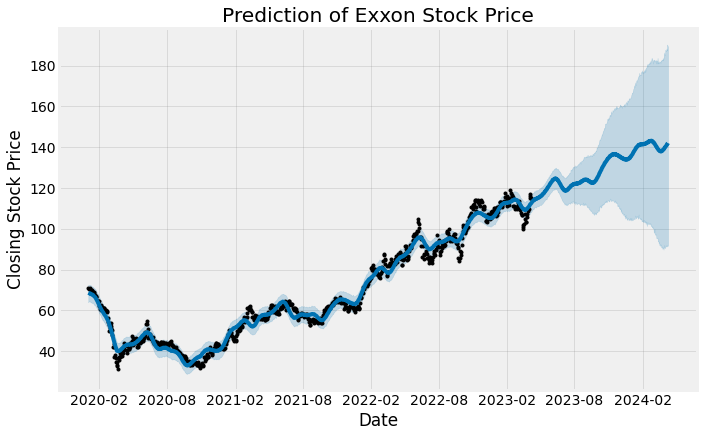

ds       yhat  yhat_lower  yhat_upper
0 2020-01-02  68.580142   63.947724   72.575720
1 2020-01-03  68.489080   64.472220   72.491025
2 2020-01-06  68.239758   64.300299   72.256503
3 2020-01-07  68.308004   64.312208   72.523759
4 2020-01-08  68.175548   64.014068   72.495359

In [72]:
model.plot(predictions)
plt.title("Prediction of Exxon Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

In [71]:
average_yhat = predictions['yhat_upper'][:29].mean()
print(f"The average of the yhat column is: {average_yhat}")

The average of the yhat column is: 68.75383959987718


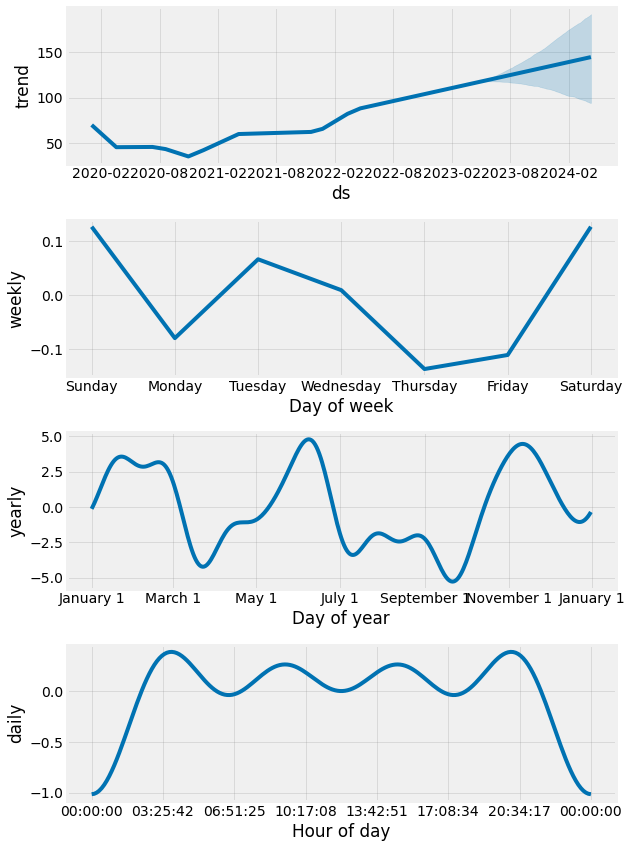

In [61]:
model.plot_components(predictions)
plt.show()

In [62]:
from prophet.plot import plot_plotly
plot_plotly(model,predictions)